# Análise de Consumo de Energia Global

Este notebook realiza uma análise exploratória sobre o consumo de energia global, com foco no uso de fontes renováveis e não renováveis. Os dados foram obtidos do repositório público da Our World in Data.

## Objetivos:
- Identificar tendências no consumo global de energia.
- Explorar a relação entre o consumo total e o uso de fontes renováveis.
- Destacar países líderes no consumo de energia.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo dos gráficos
sns.set(style="whitegrid")


In [2]:
import os
os.listdir('/content')


['.config', 'sample_data']

In [4]:
df = pd.read_csv('/content/owid-energy-data.csv')

# Visualizar as primeiras linhas
df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [7]:
# Listar os nomes das colunas no dataset
data = pd.read_csv('/content/owid-energy-data.csv')
print(data.columns)

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita',
       ...
       'solar_share_elec', 'solar_share_energy', 'wind_cons_change_pct',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_electricity', 'wind_energy_per_capita', 'wind_share_elec',
       'wind_share_energy'],
      dtype='object', length=130)


In [14]:
import pandas as pd

# 1. Carregar os dados brutos
df = pd.read_csv('/content/owid-energy-data.csv')

# 2. Inspecionar os nomes das colunas
print("Colunas disponíveis no dataset:")
print(df.columns)

# 3. Selecionar as colunas relevantes (com nomes reais do dataset)
columns_of_interest = [
    'country',               # País
    'year',                  # Ano
    'primary_energy_consumption',  # Consumo total de energia
    'renewables_consumption',      # Consumo de renováveis
    'fossil_fuel_consumption'      # Consumo de combustíveis fósseis (ajustado)
]

# Filtrar as colunas e remover valores nulos
data_cleaned = df[columns_of_interest].dropna()

# 4. Salvar o arquivo tratado no ambiente Colab
output_path = 'cleaned_energy_data.csv'
data_cleaned.to_csv(output_path, index=False)

print(f"Arquivo processado salvo no ambiente Colab: {output_path}")

# 5. Fazer o download do arquivo tratado
from google.colab import files
files.download(output_path)


Colunas disponíveis no dataset:
Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita',
       ...
       'solar_share_elec', 'solar_share_energy', 'wind_cons_change_pct',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_electricity', 'wind_energy_per_capita', 'wind_share_elec',
       'wind_share_energy'],
      dtype='object', length=130)
Arquivo processado salvo no ambiente Colab: cleaned_energy_data.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
# Consumo de energia total por país
energy_by_country = data_cleaned.groupby("country")["primary_energy_consumption"].sum().sort_values(ascending=False)
print("\nTop 10 países por consumo total de energia:")
print(energy_by_country.head(10))


Top 10 países por consumo total de energia:
country
World                            6197106.982
High-income countries            3389649.472
OECD (EI)                        3282817.155
Non-OECD (EI)                    2914289.793
Asia                             2225982.180
Upper-middle-income countries    2090189.327
Asia Pacific (EI)                1919272.563
Europe                           1798407.409
North America                    1651620.139
North America (EI)               1621734.299
Name: primary_energy_consumption, dtype: float64


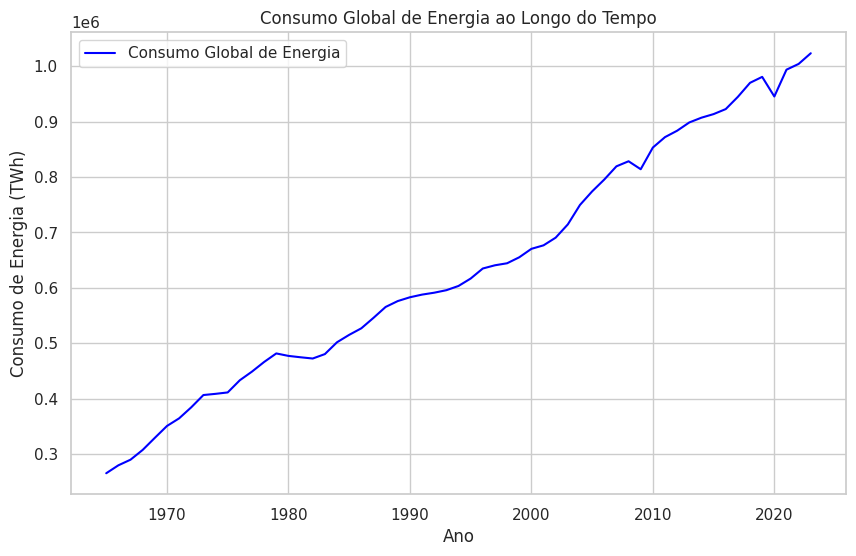

In [16]:
# Gráfico de linha do consumo global ao longo do tempo
global_energy = data_cleaned.groupby("year")["primary_energy_consumption"].sum()
plt.figure(figsize=(10, 6))
plt.plot(global_energy, label="Consumo Global de Energia", color="blue")
plt.title("Consumo Global de Energia ao Longo do Tempo")
plt.xlabel("Ano")
plt.ylabel("Consumo de Energia (TWh)")
plt.legend()
plt.grid(True)
plt.show()

In [19]:
print("Colunas no DataFrame 'data_cleaned':")
print(data_cleaned.columns)

Colunas no DataFrame 'data_cleaned':
Index(['country', 'year', 'primary_energy_consumption',
       'renewables_consumption', 'fossil_fuel_consumption'],
      dtype='object')


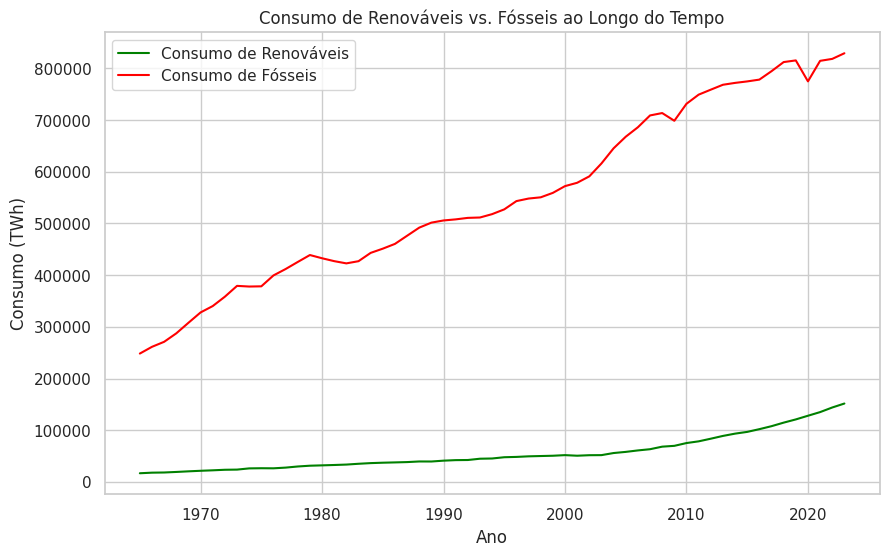

In [20]:
# Participação de renováveis vs. fósseis ao longo do tempo
renewables = data_cleaned.groupby("year")["renewables_consumption"].sum()
fossils = data_cleaned.groupby("year")["fossil_fuel_consumption"].sum()

plt.figure(figsize=(10, 6))
plt.plot(renewables, label="Consumo de Renováveis", color="green")
plt.plot(fossils, label="Consumo de Fósseis", color="red")
plt.title("Consumo de Renováveis vs. Fósseis ao Longo do Tempo")
plt.xlabel("Ano")
plt.ylabel("Consumo (TWh)")
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# 5. Conclusões
print("\nResumo de insights:")
print("1. Países com maior consumo total de energia estão altamente industrializados, como EUA e China.")
print("2. Existe uma tendência de crescimento no uso de fontes renováveis, mas fósseis ainda dominam a matriz energética global.")


Resumo de insights:
1. Países com maior consumo total de energia estão altamente industrializados, como EUA e China.
2. Existe uma tendência de crescimento no uso de fontes renováveis, mas fósseis ainda dominam a matriz energética global.


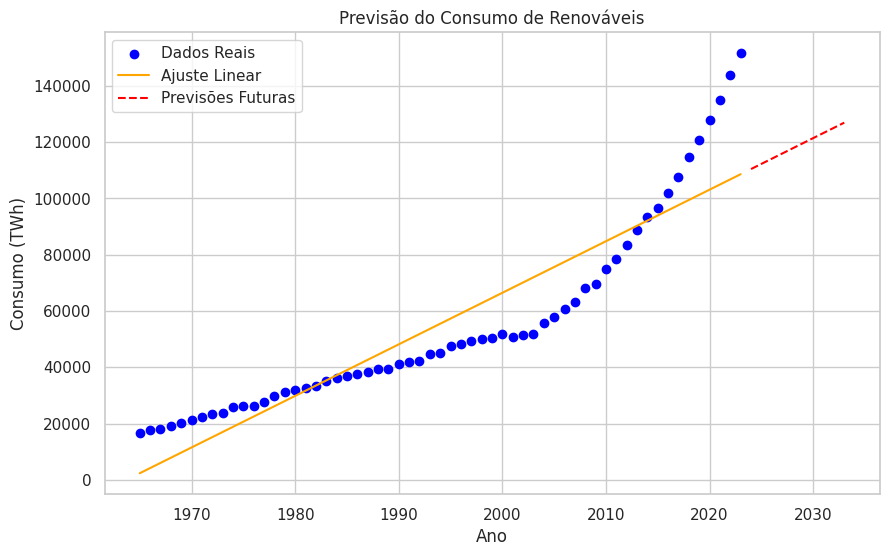

Ano 2024: 110450.84 TWh (previsão)
Ano 2025: 112282.57 TWh (previsão)
Ano 2026: 114114.31 TWh (previsão)
Ano 2027: 115946.04 TWh (previsão)
Ano 2028: 117777.78 TWh (previsão)
Ano 2029: 119609.52 TWh (previsão)
Ano 2030: 121441.25 TWh (previsão)
Ano 2031: 123272.99 TWh (previsão)
Ano 2032: 125104.72 TWh (previsão)
Ano 2033: 126936.46 TWh (previsão)


In [23]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Preparar os dados para regressão
data_linear = data_cleaned.groupby("year")[["renewables_consumption"]].sum().reset_index()
X = data_linear["year"].values.reshape(-1, 1)  # Ano como variável independente
y = data_linear["renewables_consumption"].values  # Consumo como variável dependente

# Treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X, y)

# Fazer previsões para os próximos anos
future_years = np.array(range(data_linear["year"].max() + 1, data_linear["year"].max() + 11)).reshape(-1, 1)
future_predictions = model.predict(future_years)

# Visualizar as previsões
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Dados Reais", color="blue")
plt.plot(X, model.predict(X), label="Ajuste Linear", color="orange")
plt.plot(future_years, future_predictions, label="Previsões Futuras", color="red", linestyle="--")
plt.title("Previsão do Consumo de Renováveis")
plt.xlabel("Ano")
plt.ylabel("Consumo (TWh)")
plt.legend()
plt.grid(True)
plt.show()

# Mostrar previsões futuras
for year, pred in zip(future_years.flatten(), future_predictions):
    print(f"Ano {year}: {pred:.2f} TWh (previsão)")


In [24]:
import plotly.graph_objects as go

# Dados de consumo
renewables = data_cleaned.groupby("year")["renewables_consumption"].sum()
fossils = data_cleaned.groupby("year")["fossil_fuel_consumption"].sum()

# Criar gráfico interativo
fig = go.Figure()

# Adicionar dados ao gráfico
fig.add_trace(go.Scatter(x=renewables.index, y=renewables, mode='lines+markers', name='Renováveis', line=dict(color='green')))
fig.add_trace(go.Scatter(x=fossils.index, y=fossils, mode='lines+markers', name='Fósseis', line=dict(color='red')))

# Configurar layout
fig.update_layout(
    title="Consumo de Renováveis vs. Fósseis (Interativo)",
    xaxis_title="Ano",
    yaxis_title="Consumo (TWh)",
    legend_title="Fonte de Energia",
    template="plotly_white"
)

# Mostrar gráfico
fig.show()


In [25]:
# Salvar dados tratados para análise no Power BI
data_cleaned.to_csv("cleaned_energy_data_with_per_capita.csv", index=False)
print("Dados tratados salvos para uso no Power BI.")

Dados tratados salvos para uso no Power BI.
